EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: -28.0
Root Mean Squared Error RMSE: 54 4
Mean Absolute Percentage Error MAPE% 200.0%
EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: -28.0
Root Mean Squared Error RMSE: 54 4
Mean Absolute Percentage Error MAPE% 200.0%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12512\2256634411.py:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


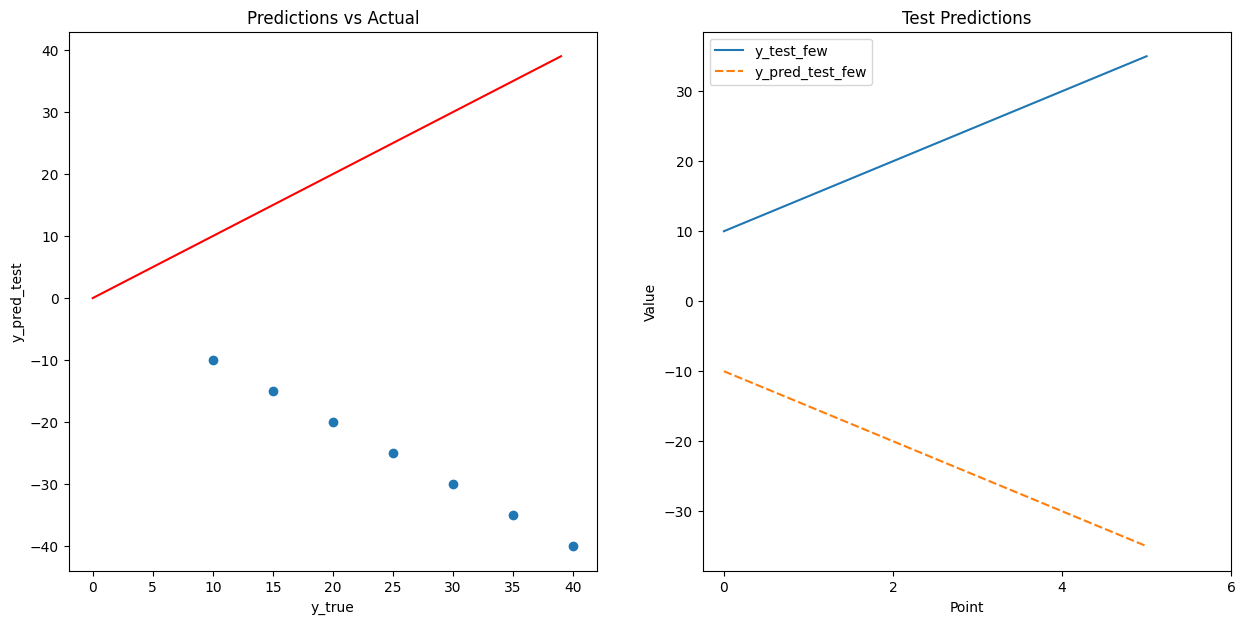

In [2]:
# Đóng gói def Evaluate_Model and def Plot_Model
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def Evaluate_Model(y_train, y_pred_train, y_test, y_pred_test):
  """
  parameters: `y_test`, `y_pred_test`
  calculates evaluation metrics,
    including R-squared, MSE, RMSE, MAE, MAPE,
      and directional accuracy (DA) 
  """
# Đóng gói def Evaluate_Model and def Plot_Model

  print('EVALUATE METRICS ON THE TRAIN SET')
  print('Coefficient of determination R2:', round(r2_score(y_train, y_pred_train), 4)) # print(model.score(X_test, y_train))
  print('Root Mean Squared Error RMSE:', round(np.sqrt(mean_squared_error(y_train, y_pred_train))), 4)
  MAPE = mean_absolute_percentage_error(y_train, y_pred_train)
    # MAPE = np.mean(np.abs((np.array(y_train) - np.array(y_pred_train)) / y_train))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 4)}%")
  
  print('EVALUATE METRICS ON THE TEST SET')
  print('Coefficient of determination R2:', round(r2_score(y_test, y_pred_test), 4)) # print(model.score(X_test, y_test))
  print('Root Mean Squared Error RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred_test))), 4)
  MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
    # MAPE = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test)) / y_test))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 4)}%")
  
def Plot_Model(y_test, y_pred_test, num_samples):
  """
  Scatter Plot(Biểu đồ phân tán) with x_axis: y_test, y_axis: y_pred_test
  Print test_pred_df
  Line Plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  """
  # Gộp 2 Plot scatterplot and lineplot
  plt.subplots(figsize=(15,7)) # return tuple (Figure, Axes). obj Figure: toàn bộ hình ảnh, obj Axes: các vùng trực quan. 
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  # Scatter plot
  ax1.scatter(y_test, y_pred_test)
  ax1.set_title("Predictions vs Actual")  #plt.title
  ax1.set_xlabel("y_true")                #plt.xlabel
  ax1.set_ylabel("y_pred_test")           #plt.ylabel

  x = range(int(max(y_test))) #vẽ đường chéo giữa.
                              # type y_test from df: <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col 
  ax1.plot(x, 'r') # Opt speed, we can use x = np.arange(int(max(y_test))).astype(int)

  # Line plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  #1 plot vẽ tập Test nhưng show ra x 6000 điểm -> vì plot ra index của hàng ban đầu. 
  #2 Muốn plot ra tập sample với ít điểm giá trị hơn. 
  #3 Muốn plot hiện điểm 1, 2, 3, ... chứ không phải điểm 0.0, 0.5, 1.0, ...
  test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test}) # Create df 3 col: index, y_test, y_pred_test 
  test_pred_subset_df = pd.DataFrame({'y_test_few': y_test[:num_samples], 'y_pred_test_few': y_pred_test[:num_samples]}) #2
  test_pred_subset_df = test_pred_subset_df.reset_index(drop=True) #1 Add a reset index and Remove old index
  
  # sns.lineplot(data=test_pred_subset_df) # data = df
  sns.lineplot(data=test_pred_subset_df).set(xticks=range(0, num_samples+1, int(num_samples/5)+1)) 
                                        # set x_axis ticks (dấu kiểm) hiện ít điểm hơn trên x
  ax2.set_title("Test Predictions")
  ax2.set_xlabel("Point") # tên hàng 
  ax2.set_ylabel("Value")
  plt.show() # show những plots above

y_train = [10 , 15, 20, 25, 30, 35, 40]
y_pred_train = [-10, -15, -20, -25, -30, -35, -40]

y_test = [10 , 15, 20, 25, 30, 35, 40]
y_pred_test = [-10, -15, -20, -25, -30, -35, -40]
Evaluate_Model(y_train, y_pred_train, y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 6)

### Packaging the LinearRegressionModel Class for hyperparameters tuning in Ridge and Lasso Regression

Methodology: 
Grid Search (tìm kiếm theo lưới) and randomized search (tìm kiếm ngẫu nhiên) for hyperparameters tuning:
- are approaches to finding hyperparameters for machine learning models.
- Grid Search:    
    - Make sure to find the best solution.    
    - Easy reproducibility of results.    
    - It takes a lot of computation time when the model has many hyperparameters.
- Randomized Search in reverse. (fits multiple hyperparameters)